# Topic Extraction & Analysis

Topic Analysis adalah salah satu teknik untuk mengerti data teks dengan memberikan "tags" pada data tersebut sesuai dengan topik dari teks tersebut. Topic Analysis  memanfaatkan Natural Language Processing  untuk mereka ulang struktur data teks dan menemukan pola-pola yang terdapat didalamnya.

Dua pendekatan utama untuk melakukan topic analysis adalah NLP topic modeling and NLP topic classification.

Topic Modeling adalah teknik unsupervised yang mencoba mencari topik berdasarkan pola dari data yang dimiliki, sedangkan Topic Classification adalah teknik supervised yang menggunakan topic yang sudah ada untuk mengklasifikasikan data yang belum diketahui nilai topiknya

In [1]:
# Import Modul

import json, re, string
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF

Tampilkan Data Set

In [2]:
df_news = pd.read_csv('berita.csv')
df_news

,Unnamed: 0,judul
0,0,Luhut Pandjaitan Larang Pejabat ke Luar Negeri...
1,1,"Indonesia Waspadai Omicron, Luhut Pandjaitan L..."
2,2,WHO Konfirmasi Varian Covid-19 Omicron di 23 N...
3,3,Kemenkes Minta Masyarakat Waspada dengan Covid...
4,4,Ahli Epidemiologi Ungkap Kunci Cegah Penularan...
...,...,...
71,71,"Awas Varian Baru Covid-19 Omicron, WHO Peringa..."
72,72,"Larang Penerbangan dari 8 Negara, Joe Biden Di..."
73,73,"Hal yang Perlu Diketahui dari Omicron, Varian ..."
74,74,"Varian Virus Corona Baru 'Omicron', Memicu Ket..."


### Text Preprocessing

Kita akan membersihkan data yang kita miliki. Kita akan menyediakan dua buah fungsi, fungsi pertama untuk case folding dan fungsi kedua untuk filter stopword

In [3]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data
 
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

In [4]:
for index in range (len(df_news["judul"])):
    df_news["judul"].iloc[index] = case_folding(df_news["judul"].iloc[index])
    df_news["judul"].iloc[index] = word_tokenize(df_news["judul"].iloc[index])
    df_news["judul"].iloc[index] = stopword_cleaner(df_news["judul"].iloc[index])

C:\Users\ighfirlyan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
data_berita = [berita.split() for berita in df_news["judul"]]
data_berita

[['luhut',
  'pandjaitan',
  'larang',
  'pejabat',
  'negeri',
  'cegah',
  'omicron',
  'kesalahan',
  'menteri',
  'diungkap'],
 ['indonesia',
  'waspadai',
  'omicron',
  'luhut',
  'pandjaitan',
  'larang',
  'pejabat',
  'negara',
  'lakukan',
  'perjalanan',
  'negeri'],
 ['who',
  'konfirmasi',
  'varian',
  'covid',
  'omicron',
  'negara',
  'daftar',
  'lengkapnya'],
 ['kemenkes', 'masyarakat', 'waspada', 'covid', 'varian', 'omicron'],
 ['ahli',
  'epidemiologi',
  'kunci',
  'cegah',
  'penularan',
  'covid',
  'varian',
  'omicron'],
 ['mencegah', 'penularan', 'covid', 'varian', 'omicron', 'diwaspadai'],
 ['cek',
  'fakta',
  'varian',
  'covid',
  'omicron',
  'juli',
  'simak',
  'kebenarannya'],
 ['dirasakan',
  'pasien',
  'covid',
  'omicron',
  'dokter',
  'afrika',
  'selatan',
  'mengungkapnya'],
 ['covid',
  'varian',
  'omicron',
  'merebak',
  'balita',
  'afrika',
  'selatan',
  'sumbang',
  'persen',
  'rawat',
  'inap',
  'rumah',
  'sakit'],
 ['ilmuwan',
  '

## Text Modeling
Pada tahap ini kita akan memanfaatkan teknik LDA (Latent Dirichlet Allocation) dan library Gensim. LDA akan menghitung koherensi dari suatu baris data terhadap topik-topik yang tidak diketahui, tapi diasumsikan ada. 

Ada beberapa parameter yang kita perlu ketahui pada LDA, diantaranya adalah

Alpha - parameter similarity data. Nilai Alpha yang rendah merepresentasikan dokumen yang memiliki topik yang mudah di bedakan. Nilai lebih tinggi merepresentasikan dokumen/data yang bisa memiliki lebih banyak kemungkinan

Beta - parameter similarity topik. Ditunjukan dengan distribusi kata per topik. Nilai beta yang rendah berarti 

In [6]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array
import numpy as np
import tqdm

Kita akan membuat sebuah variabel yang isinya melakukan maping kata dalam satu dokumen terhadapt semua kata pada dataset. hasilnya ada nilai seperti matriks dengan nilai biner.

In [7]:
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

In [8]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(
    random_state=100,
    chunksize=100,
    per_word_topics=True,
    corpus = doc_term_matrix, 
    num_topics=5, 
    id2word = dictionary, 
    passes=50
    )

Saya membuat terlebih dahulu model awal dengan jumlah topik sebanyak 5. setelah itu kita jalankan untuk melatih model kita.
Setelah selesai, kita tampilkan data kita

In [9]:
from pprint import pprint
pprint(ldamodel.print_topics())

[(0,
  '0.086*"omicron" + 0.067*"varian" + 0.056*"negara" + 0.042*"covid" + '
  '0.023*"who" + 0.019*"cegah" + 0.016*"larang" + 0.016*"indonesia" + '
  '0.015*"afrika" + 0.014*"wna"'),
 (1,
  '0.025*"omicron" + 0.014*"gejala" + 0.014*"langkah" + 0.014*"tegaskan" + '
  '0.014*"ilmuwan" + 0.014*"hadapi" + 0.014*"dokter" + 0.014*"penciuman" + '
  '0.014*"dibeberkan" + 0.014*"menemukannya"'),
 (2,
  '0.076*"omicron" + 0.065*"varian" + 0.043*"covid" + 0.018*"cegah" + '
  '0.018*"masuk" + 0.018*"buruk" + 0.018*"negara" + 0.012*"picu" + '
  '0.012*"cepat" + 0.012*"indonesia"'),
 (3,
  '0.054*"omicron" + 0.045*"varian" + 0.031*"covid" + 0.031*"virus" + '
  '0.021*"who" + 0.021*"corona" + 0.012*"waspada" + 0.012*"asia" + '
  '0.012*"penularan" + 0.012*"cepat"'),
 (4,
  '0.090*"omicron" + 0.070*"varian" + 0.050*"covid" + 0.040*"selatan" + '
  '0.039*"afrika" + 0.021*"dunia" + 0.014*"dokter" + 0.013*"perjalanan" + '
  '0.013*"vaksin" + 0.012*"cegah"')]


Bagaimana menjelaskan data diatas?

Angka di awal tuple adalah indeks topiknya (0-4) karena kita memilih 5 topik. Angka di sebelah kiri kata adalah nilai bobot dari kata tersebut terhadap topik yang bersangkutan (misalnya omicron bernilai 0.086 pada topik 0).
Yang ditampilkan di atas 10 kata dengan nilai pembobotan terbesar. Tantangan dari LDA dan teknik topic modeling sejenisnya adalah teknik ini hanya akan memberikan nilai bobot dari setiap kata terharap suatu topik (yang dilambangkan dengan indeks). Untuk interpretasi dari setiap topiknya diserahkan kepada analysis.
 
Misalkan indeks 0 karena terdapat, kata who, cegah, larang, indonesia, wna, afrika bisa disimpulkan bahwa Topik A menjelaskan tentang larangan wna dari afrika untuk mencegah penyebaran.

## Coherence Value

Mungkin kita bertanya, bagaimana saya tahu kalau 5 adalah jumlah topik yang tepat? jawabannya adalah dengan melihat coherence value dari model.

Untuk menghitung coherence value kita bisa menggunakan metode CoherenceModel pada gensim.

In [10]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_berita, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36441616679187766


kita kan membuat fungsi untuk melakukan hyper tuning parameter pada model kita untuk memperbaiki coherence value. Pertama kita buat dulu fungsinya

In [11]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

Setelah itu kita lakukan proses pencarian nilai koheren terhadap parameter yang dimiliki. karena itu kita kan mencari nilai k, a, dan b terbaik.

In [12]:
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [42:53<00:00,  4.76s/it]


validasi set, digunakan untuk memvalidasi data yang kita gunakan, pada kesempatan ini dibagi menjadi saat 75% data dengan 100% data.
tqdm adalah library yang digunakan untuk melihat persen proses berjalan.
hasilnya ditunjukan pada tabel dibawah

Kita pilih salah satu angka dengan nilai yang sama, pada kesempatan ini saya memilih alpha = 0.01 & beta 0.3. Ini dilakukan untuk melihat nilai k (topik) terbaik
Lalu hasilnya kita plot

In [15]:
df_tuning_result = pd.read_csv('lda_tuning_results.csv')

<AxesSubplot:xlabel='Topics'>

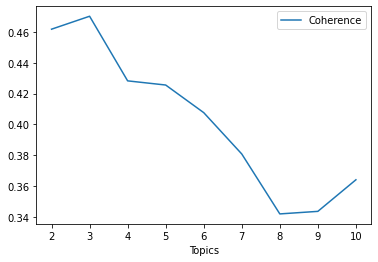

In [16]:
df_plot = df_tuning_result[(df_tuning_result.Alpha == "0.01") & (df_tuning_result.Beta == "0.31") & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

Semakin tinggi artinya semakin baik nilainya. Dengan berdasar pada hal tersebut maka kita akan memilih k = 3
Selanjutnya kita akan memilih alpha dan beta terbaik, caranya adalah dengan memilih k = 3 pada tabel, dan cari kombinasi alpha dan beta dengan coherence value terbaik

In [17]:
df_plot_2 = df_tuning_result[(df_tuning_result.Topics == 3) & (df_tuning_result.Validation_Set == "100% Corpus")].copy()
df_plot_2.sort_values(by="Coherence", ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
319,100% Corpus,3,0.9099999999999999,symmetric,0.483354
316,100% Corpus,3,0.9099999999999999,0.31,0.483354
318,100% Corpus,3,0.9099999999999999,0.9099999999999999,0.475932
314,100% Corpus,3,0.61,symmetric,0.475045
301,100% Corpus,3,0.01,0.31,0.470188
311,100% Corpus,3,0.61,0.31,0.469535
313,100% Corpus,3,0.61,0.9099999999999999,0.462772
312,100% Corpus,3,0.61,0.61,0.461958
317,100% Corpus,3,0.9099999999999999,0.61,0.459135
300,100% Corpus,3,0.01,0.01,0.457989


Terlihat dari tabel di atas, coherence value  terbaik ada saat nilai alpha 0.9 dan beta 0.9.

setelah mendapatkan parameter terbaik, saatnya kita buat kembali model kita

In [18]:
lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.9,
                                           eta=0.9)
 
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.067*"omicron" + 0.051*"varian" + 0.034*"covid" + 0.027*"negara" + '
  '0.026*"afrika" + 0.024*"selatan" + 0.017*"cegah" + 0.014*"indonesia" + '
  '0.011*"perjalanan" + 0.011*"larang"'),
 (1,
  '0.024*"omicron" + 0.010*"varian" + 0.009*"waspada" + 0.007*"langkah" + '
  '0.007*"orang" + 0.007*"who" + 0.006*"berkaitan" + 0.006*"covid" + '
  '0.006*"larangan" + 0.006*"asia"'),
 (2,
  '0.053*"omicron" + 0.052*"varian" + 0.037*"covid" + 0.012*"vaksin" + '
  '0.011*"dunia" + 0.011*"who" + 0.009*"cepat" + 0.009*"picu" + 0.008*"negara" '
  '+ 0.007*"buruk"')]


## Visualisasi 

Visualisasi bisa dilakukan dengan memanfaatkan modul pyLDAvis, install dengan perintah

In [19]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [20]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

C:\Users\ighfirlyan\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.042275  0.010237       1        1  48.894683
2      0.007499 -0.028916       2        1  32.377076
1      0.034776  0.018679       3        1  18.728240, topic_info=           Term       Freq      Total Category  logprob  loglift
40      selatan   9.000000   9.000000  Default  30.0000  30.0000
19       varian  29.000000  29.000000  Default  29.0000  29.0000
35       afrika  10.000000  10.000000  Default  28.0000  28.0000
15        covid  20.000000  20.000000  Default  27.0000  27.0000
52       vaksin   3.000000   3.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
172         wna   0.640076   3.096099   Topic3  -5.2902   0.0988
12       negara   0.681862  11.336702   Topic3  -5.2269  -1.1358
37       dokter   0.634743   3.639741   Topic3  -5.2985  -0.0713
216       tutup   0.624964   2.588983   Topic3  -5.3141   0.2538
113  pemerintah   0.617397   2.064193   Topic3  -5.3263   0.4682

[156 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
35        1  0.899710  afrika
35        2  0.099968  afrika
35        3  0.099968  afrika
24        1  0.479202    ahli
24        2  0.479202    ahli
...     ...       ...     ...
20        2  0.315217     who
20        3  0.157609     who
172       1  0.645974     wna
172       2  0.322987     wna
172       3  0.322987     wna

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])